
Una **sucesión** es una lista ordenada de números, llamados términos, que generalmente siguen un patrón específico o una regla matemática. Cada término en la sucesión está asociado a una posición o índice. Por ejemplo, la sucesión de los números naturales $1, 2, 3, 4, 5, \ldots$ es una sucesión en la que cada término es el siguiente número natural.

Las **sucesiones recursivas** son aquellas en las que cada término se define en función de los términos anteriores. En otras palabras, se utiliza una fórmula de recurrencia para determinar los términos de la sucesión. Un ejemplo clásico de sucesión recursiva es la **sucesión de Fibonacci**, donde cada término es la suma de los dos términos anteriores:

$$
F_n = F_{n-1} + F_{n-2}
$$

con las condiciones iniciales $F_0 = 0$ y $F_1 = 1$. Así, los primeros términos de la sucesión de Fibonacci serían: $0, 1, 1, 2, 3, 5, 8, 13, \ldots$.

En resumen, las sucesiones recursivas son herramientas poderosas en matemáticas y ciencias, ya que permiten describir complejas relaciones entre términos de una secuencia mediante reglas simples y elegantes.


![Fibonacci](figures/fibonacci.png)

[Algunas curiosidades](https://www.biocuriosidades.com/recursos-docentes/la-sucesion-de-fibonacci-y-la-proporcion-aurea/)


**Notación general**
Una sucesión se denota generalmente como $\{a_n\}$, donde $a_n$ es el $n$-ésimo término de la sucesión. De forma genral se puede escribir 

$$a_{n+1} = f(a_n,a_{n-1}, a_{n-2}, \ldots, a_{n-k})$$


Una **sucesión de diferencias de primer orden** es una nueva sucesión obtenida al calcular las diferencias entre términos consecutivos de la sucesión original. Si tenemos una sucesión $a_1, a_2, a_3, \ldots$, la sucesión de primeras diferencias $\Delta a$ se define como:

$$
\Delta a_n = a_{n+1} - a_n
$$

Esta técnica se utiliza para analizar la tasa de cambio y detectar patrones en la sucesión original.

$$a_{n+1}-a_n=g(a_n)$$
$$a_{n+1}=a_n+g(a_n)=f(a_{n+1})$$


tomando $a_n=x$ podemos escribir

$$f(x)=x+g(x).$$


**Notación** Podemos reemplazar $t$ por $n$ donde $t$ para representar el tiempo para que una célula se divida, o un insecto se reproduzca. De esta manera, $a_t$ representa la cantidad de células o insectos en el tiempo $t$.

**Ejemplo** El parasito de la malaria se reproduce cada 24 horas y reproduce 8 nuevos parasitos, así 

$$N_{t+1}=8N_t,\text{ tomando }N_1=1$$

$$N_{t}=8^t$$

**Ejemplo** E. coli la población inicial es de $N_0$ si se reproduce cada 20 minutos y se reproduce 2 veces, entonces

$$N_{t}=2^tN_0,\text{ tomando }N_0=1$$

**De forma general** Una población de células  se divide sincronicamentecon cadas células produciendo $R$ hijos en cada división, entonces

$$N_{t}=R^tN_0.$$

$R$ **se llama el factor de crecimiento per capita**.




Una ecuación general para la población de insectos consiste en contabilizar la tasa de nacimientos y la tasa de muertes. Si $\beta$ es la tasa de nacimientos y $\mu$ es la tasa de muertes, entonces la ecuación de crecimiento de la población de insectos se puede escribir como:

$$N_{t+1} = N_t + inflow - outflow$$

si suponemos que la población sobrevive únicamente un ciclo de vida, entonces

$$N_{t+1} = N_t + \beta N_t - \mu N_t $$

después de contabilizar la población de la próxima generación $\mu=1$ y $\beta=R$ entonces

$$N_{t+1} = R N_t$$

* ¿Como podemos intermpretar la ecuación anterior si $\mu=0$?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

# Definimos la función para la sucesión
def sucesion(N0, R):
    N = [N0]
    for _ in range(100):  # Generamos 100 términos de la sucesión
        N.append(R * N[-1])
    plt.figure(figsize=(10, 6))
    plt.plot(N, marker='o', linestyle='-', color='b')
    plt.title(f'Sucesión $N_{{t+1}} = R \\cdot N_t$, con $R = {R}$')
    plt.xlabel('Iteraciones')
    plt.ylabel('$N_t$')
    plt.grid(True)
    plt.show()

# Creamos un slider interactivo para R
interact(sucesion, 
         N0=FloatSlider(min=1, max=10, step=0.5, value=1, description='N0'),
         R=FloatSlider(min=0, max=2, step=0.1, value=1, description='R'))

interactive(children=(FloatSlider(value=1.0, description='N0', max=10.0, min=1.0, step=0.5), FloatSlider(value…

<function __main__.sucesion(N0, R)>

Note que este crecimiento no es realista puesto que si la tasa de reproducción es mayor que 1 entonces la población crecerá indefinidamente.


+ ¿Porqué es importante el crecimiento exponencial?

+ ¿Por qué si $R<0$ decrece la población?



## Modelos lógistico

El modelo logístico es un modelo matemático que describe el crecimiento de una población en función del tiempo. Este modelo tiene en cuenta la capacidad de carga del entorno, es decir, el número máximo de individuos que el entorno puede soportar de forma sostenible. La ecuación logística se puede escribir como:

$$N_{t+1} =  N_t\Big[1+r \Big(1 - \frac{N_t}{k}\Big)\Big]$$


donde $r$ es la tasa de crecimiento intrínseco de la población y $k$ es la capacidad de carga del entorno. La capacidad de carga es el número máximo de individuos que el entorno puede soportar de forma sostenible.


**¿Cómo podemos interpretar $r \Big(1 - \frac{N_t}{k}\Big)$?**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

# Definimos la función para la sucesión
def sucesion(N0, r, k):
    N = [N0]
    for _ in range(100):  # Generamos 100 términos de la sucesión
        N.append(N[-1] * (1 + r * (1 - N[-1] / k)))
    plt.figure(figsize=(10, 6))
    plt.plot(N, marker='o', linestyle='-', color='b')
    #plt.title(f'Sucesión $N_{{t+1}} = N_t \left[1 + r \left(1 - \\frac{{N_t}}{{k}}\right)\right]$')
    plt.xlabel('Iteraciones')
    plt.ylabel('$N_t$')
    plt.grid(True)
    plt.show()

# Creamos sliders interactivos para N0, r y k
interact(sucesion, 
         N0=FloatSlider(min=1, max=10, step=0.5, value=1, description='N0'),
         r=FloatSlider(min=0, max=2, step=0.1, value=0.5, description='r'),
         k=FloatSlider(min=1, max=20, step=1, value=10, description='k'))


interactive(children=(FloatSlider(value=1.0, description='N0', max=10.0, min=1.0, step=0.5), FloatSlider(value…

<function __main__.sucesion(N0, r, k)>

Tomando 

$$x_t=\frac{r}{(1+r)k} N_t$$

tenemos que

$$x_{t+1}=\frac{r}{(1+r)k} N_{t+1}=\frac{r}{(1+r)k} N_t\Big[1+r \Big(1 - \frac{N_t}{k}\Big)\Big]$$

$$x_{t+1}=\frac{r}{k} N_t - \frac{r^2N_t^2}{(1+r)k^2}$$


de la primera ecuación podemos despejar $N_t$ y tenemos

$$N_t=\frac{(1+r)k}{r}x_t$$

y sustituyendo

$$x_{t+1}=\frac{r}{k} \frac{(1+r)k}{r}x_t - \frac{r^2}{(1+r)k^2}\frac{(1+r)^2k^2}{r^2}x_t^2$$


Así,

$$x_{t+1}=(1+r)x_t-(1+r)x_t^2$$
$$x_{t+1}=(1+r)x_t(1-x_t)$$

De esta foram escribimos $R_{max}=1+r$ el cual es el valor más grande de $R$ como una función de $N_t$, Así tenemos
la ecuación logistica 

$$x_{t+1}=R_{max}x_t(1-x_t)$$

es tambien llamada ecuacion 

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

def logistic_function(N0, R):
    N = [N0]
    rango = 100
    for _ in range(rango):
        N.append(R * N[-1] * (1 - N[-1]))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, rango+2), N, marker='o', linestyle='', color='b')
    plt.title('Logistic Function')
    plt.xlabel('Iterations')
    plt.ylabel('Population')
    plt.grid(True)
    plt.show()

interact(logistic_function, 
         N0=FloatSlider(min=0, max=1, step=0.05, value=0.5, description='N0'),
         R=FloatSlider(min=0, max=5, step=0.1, value=3.2, description='R'))



interactive(children=(FloatSlider(value=0.5, description='N0', max=1.0, step=0.05), FloatSlider(value=3.2, des…

<function __main__.logistic_function(N0, R)>

# Sucesiones

Una sucesión es una lista ordenada de números. Por ejemplo, la sucesión de los primeros 5 números naturales es 1, 2, 3, 4, 5. En general, una sucesión puede ser finita o infinita. En este problema, se te dará una sucesión de números y deberás determinar si es creciente, decreciente o ninguna de las dos.

$$a_n=\frac{1}{n}$$

Los primeros 5 términos de la sucesión son:

$$1, \frac{1}{2}, \frac{1}{3}, \frac{1}{4}, \frac{1}{5}$$

si los escribimos en decimal, obtenemos:

$$1, 0.5, 0.333333, 0.25, 0.2$$


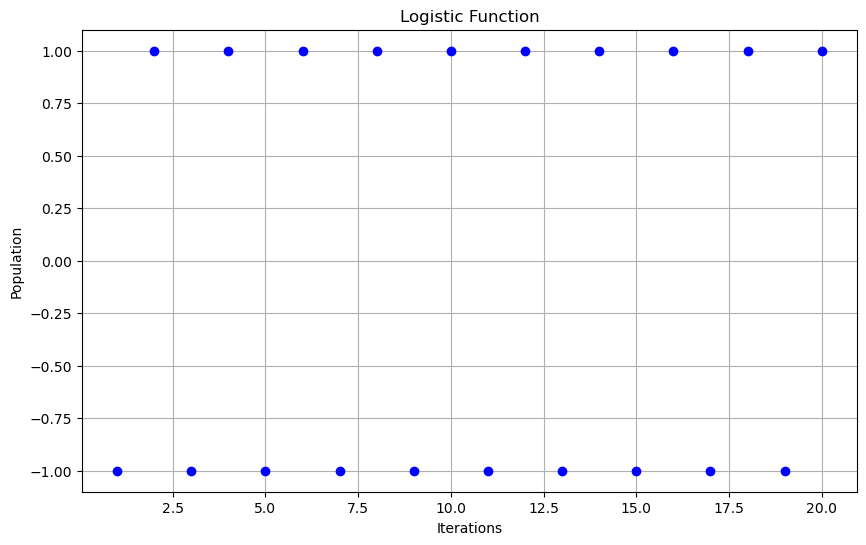

In [33]:

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

rango=20
def function():
    N = []
    for j in range(rango):
        N.append((-1)**(j-1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, rango+1),N, marker='o', linestyle='', color='b')
    plt.title('Logistic Function')
    plt.xlabel('Iterations')
    plt.ylabel('Population')
    plt.grid(True)
    plt.show()

function()


# Definición de un límite informal
 Se dice que una sucesión $\{a_n\}$ tiene un límite $L$ o tiende a $L$ cuando $n$ tiende es significativamente grande entonces  $a_n$ se acerca a $L$. En otras palabras, la sucesión se acerca a un valor fijo a medida que $n$ se hace muy grande. Matemáticamente, esto se puede expresar como:

$$\lim_{n \to \infty} a_n = L$$

En caso contrario se dice que la sucesión diverge.


![Fibonacci](figures/susimage.png)

Un limite importate 

$$\lim_{n \to \infty} \frac{1}{n}=0$$

$$\lim_{n \to \infty} \frac{1}{n^2}=0$$

$$\lim_{n \to \infty} \frac{1}{n^p}=0\text{ con }p>0$$ 

![limites](figures/limites.png)

# ejercicios

1. $a_n=\frac{1}{3n^4}$
2. $a_n=\frac{1}{n^2}$
3. $a_n=\frac{2n^2+n-1}{n^2}$
4. $a_n=\frac{n^3-1}{n}$

# Sucesión geometrica

Una sucesión geométrica es una sucesión en la que cada término se obtiene multiplicando el término anterior por una constante fija. Esta constante se conoce como la razón de la sucesión. Por ejemplo, la sucesión $2, 4, 8, 16, 32, \ldots$ es una sucesión geométrica con una razón de 2, ya que cada término es el doble del término anterior.


# Definición de una sucesión geométrica

Una sucesión geométrica es una sucesión de la forma:

$$b_n = a \cdot r^{n-1}$$

donde $a$ es el primer término de la sucesión $r$ es la razón común de la sucesión. Por ejemplo, la sucesión $2, 4, 8, 16, 32, \ldots$ se puede escribir como:

$$b_n = 2 \cdot 2^{n-1}$$
    

* ¿ que podemos decir del límite de la sucesión?

* ¿ que podemos decir de la sucesión si $r>1$?

* ¿ que podemos decir de la sucesión si $r<1$?

* ¿ que podemos decir de la sucesión si $r=1$?

* ¿ que podemos decir de la sucesión si $r=0$?




 
**Crecimiento de células**
En un experimento de laboratorio, una colonia de células se divide en dos cada día. Si comenzamos con una sola célula, el número de células después de $n$ días es:
$$ a_n = 2^n $$



**Metabolismo de medicamentos**
Consideremos un medicamento administrado a un paciente que se metaboliza a la mitad cada hora. Si la concentración inicial del medicamento es de $8$ mg/mL, la concentración después de $n$ horas es:
$$ a_n = 8 \cdot \left( \frac{1}{2} \right)^n $$



**Degradación de sustancias en el cuerpo**
Supongamos que una sustancia tóxica en el cuerpo se reduce a un tercio de su concentración original cada hora. Si la concentración inicial es de $27$ mg/L, la concentración después de $n$ horas es:
$$ a_n = 27 \cdot \left( \frac{1}{3} \right)^n $$

## Definicición de una sucesión acotada

Una sucesión $\{a_n\}$ se dice que está acotada si existe un número real $M$ tal que $|a_n| \leq M$ para todo $n$ en el conjunto de números naturales. En otras palabras, una sucesión está acotada si todos sus términos son menores o iguales a un número real fijo $M$.


## Definición de una sucesión monótona

Una sucesión $\{a_n\}$ se dice que es creciente si 
$$a_{n+1} \geq a_n$$ para todo $n$ en el conjunto de números naturales, en el caso que la desigualdad sea estricta se dice que es estrictamente creciente.


De manera similar, una sucesión $\{a_n\}$ se dice que es decreciente si $$a_{n+1} \leq a_n$$ para todo $n$ en el conjunto de números naturales. En otras palabras, una sucesión es decreciente si cada término es menor o igual al término anterior. Si la desigualdad es estricta se dice que es estrictamente decreciente.

Una sucesión se dice monótona si es creciente o decreciente.

Para ver que una sucesión es creciente  podemos estudiar las siguientes inecuaciones 

+ $a_{n+1}-a_n\geq 0$

+ $\frac{a_{n+1}}{a_n}\geq 1$

# Teorema

Si una sucesión es acotada y monótona entonces converge. 

# Ejemplo 

1. $a_n=\frac{1}{n}$ es acotada y decreciente.
 
    
    Note que $a_n=\frac{1}{n}$ es acotada puesto que $a_n<1$ para todo $n$ en el conjunto de números naturales. 
    
    Puesto que $a_{n+1}-a_n=\frac{1}{n+1}-\frac{1}{n}=\frac{n-(n+1)}{n(n+1)}=-\frac{1}{n(n+1)}<0$ para todo $n$ en el conjunto de números naturales.

 2. $a_n=\frac{1}{n^2}$ es acotada y decreciente.

    Note que $a_n=\frac{1}{n}$ es acotada puesto que $a_n<1$ para todo $n$ en el conjunto de números naturales. 

    Puesto que $\frac{a_{n+1}}{a_n}=\frac{\frac{1}{(n+1)^2}}{\frac{1}{n^2}}=\frac{n^2}{(n+1)^2}<1$ para todo $n$ en el conjunto de números naturales.

3. $a_n=\frac{2n^2+n-1}{n^2}$ es acotada y creciente.

    Note que $a_n=\frac{2n^2+n-1}{n^2}$ es acotada puesto que $a_n<3$ para todo $n$ en el conjunto de números naturales. 
    
    Puesto que $a_{n+1}-a_n=\frac{2(n+1)^2+(n+1)-1}{(n+1)^2}-\frac{2n^2+n-1}{n^2}=\frac{2n^2+4n+2+n+1-1-2n^2-n+1}{n^2(n+1)^2}=\frac{3n+2}{n^2(n+1)^2}>0$ para todo $n$ en el conjunto de números naturales.

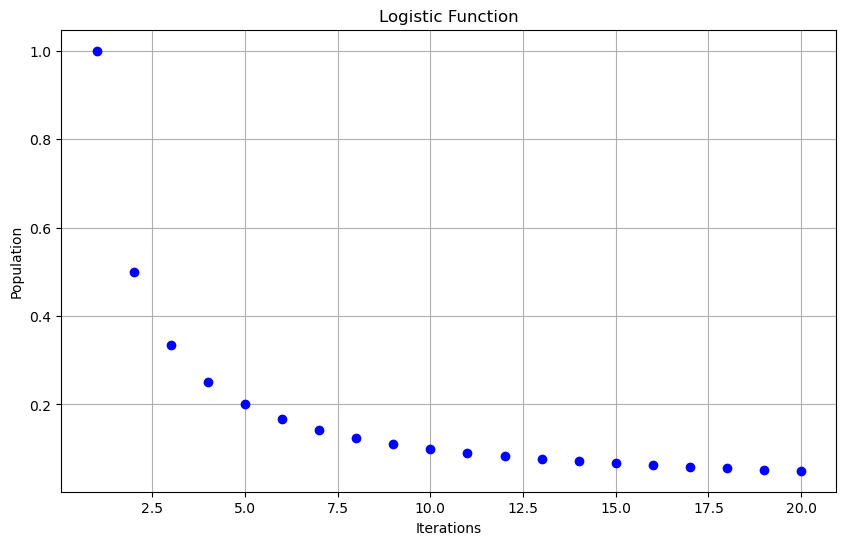

In [34]:

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

rango=20
def function():
    N = []
    for j in range(rango):
        N.append((1)/(j+1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, rango+1),N, marker='o', linestyle='', color='b')
    plt.title('Logistic Function')
    plt.xlabel('Iterations')
    plt.ylabel('Population')
    plt.grid(True)
    plt.show()

function()


**Concentración de un medicamento**

Un medicamento se administra a un paciente a la misma hora todos los días. Supongamos que la concentración del medicamento es $C_n$ (medida en mg/mL) después de la inyección en el día $n$. Antes de la inyección del día siguiente, solo el 30\% del medicamento presente el día anterior permanece en el torrente sanguíneo. Si la dosis diaria aumenta la concentración en 0.2 mg/mL, encuentra la concentración después de cuatro días.

**Solución**

La concentración del medicamento después de la inyección en el día $n$ se puede expresar como:

$$C_n = 0.3 \cdot C_{n-1} + 0.2$$

Así 

$$C_1 = 0.3 \cdot C_{0} + 0.2$$

$$C_2 = 0.3 \cdot C_{1} + 0.2$$

$$C_3 = 0.3 \cdot C_{2} + 0.2$$

$$C_4 = 0.3 \cdot C_{3} + 0.2$$

Sustituyendo $C_1$ en $C_2$ y así sucesivamente tenemos

$$C_2 = 0.3 \cdot \Big(0.3 \cdot C_{0} + 0.2\Big) + 0.2$$

¿Podemos calcular el límite de la sucesión?


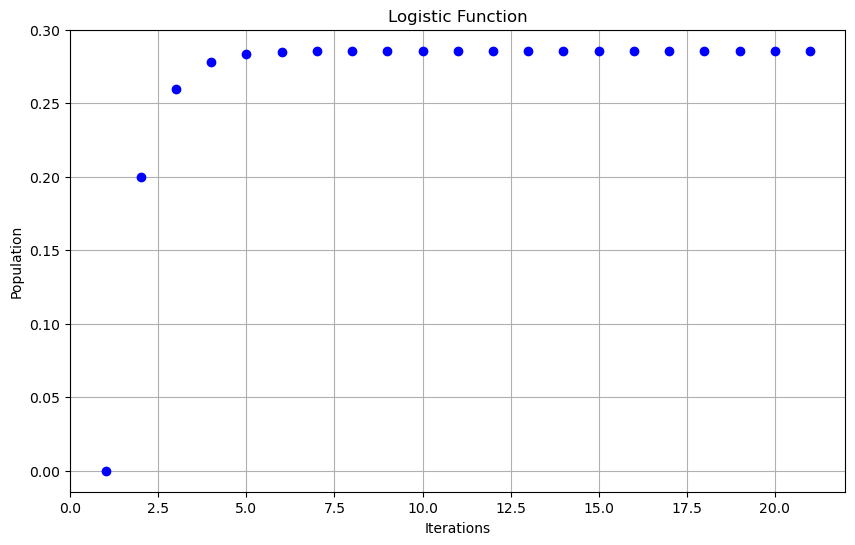

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

rango=20
def function():
    N = [0]
    for j in range(rango):
        N.append(0.3*N[-1]+0.2)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, rango+2),N, marker='o', linestyle='', color='b')
    plt.title('Logistic Function')
    plt.xlabel('Iterations')
    plt.ylabel('Population')
    plt.grid(True)
    plt.show()

function()

Si suponemos que la serie converge entonces

$$\lim_{n \to \infty} C_n = C$$

luego 

$$C_{n+1} = 0.3 \cdot C_{n} + 0.2$$
tomando límites en ambos lados de la ecuación anterior tenemos

$$\lim_{n \to \infty} C_{n+1} = 0.3 \cdot \lim_{n \to \infty} C_{n} + 0.2$$
por las propiedades de los límites tenemos

$$C = 0.3 \cdot C + 0.2$$

despejando $C$ tenemos

$$C = \frac{0.2}{0.7}=\frac{2}{4}\approx 0.2857 mg/mL$$

## Ejercicio


$$ x_{t+1}=r x_t(1-x_t)$$
**Ecuación de diferencia logística** Calcule grafique los primeros 30 términos de la ecuación logística  en los siguientes casos. Luego describa el comportamiento
+ $x_0=0.8,r=2.8$
+ $x_0=0.4,r=3.4$


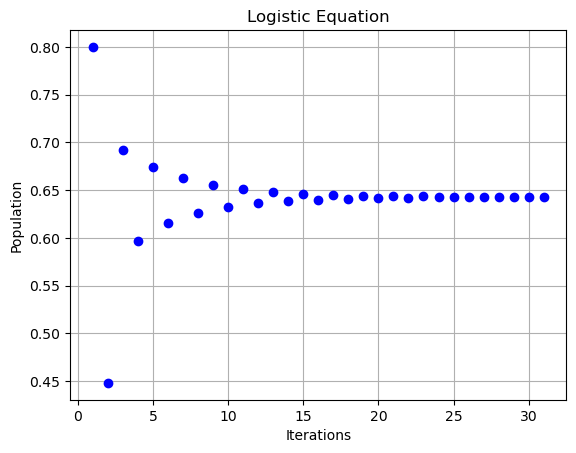

In [45]:
import numpy as np

import matplotlib.pyplot as plt

def logistic_equation(x0, r, iterations):
    x = [x0]
    for _ in range(iterations):
        x.append(r * x[-1] * (1 - x[-1]))
    
    plt.plot(range(1, iterations+2),x, marker='o', linestyle='', color='b')
    plt.xlabel('Iterations')
    plt.ylabel('Population')
    plt.title('Logistic Equation')
    plt.grid(True)
    plt.show()

x0 = 0.8
r = 2.8
iterations = 30

logistic_equation(x0, r, iterations)

+ ¿Converge la sucesión?
+ Si converge entonces ¿a qué valor converge?